# Depth-first search (DFS) 

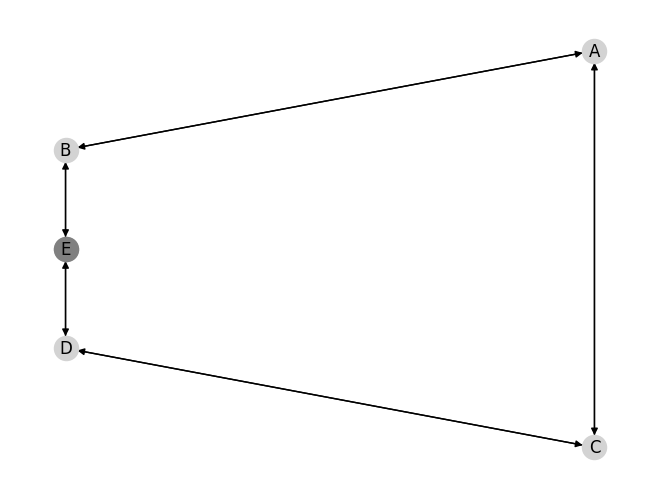

In [12]:
import networkx as nx
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
#G={'A':['B','C'],'B':['D','E'],'C':['E'],'D':['E']}
G={'A':['B','C'],'B':['A','E'],'C':['A','D'], 'D':['C','E'],'E':['B','D']}
source='A'
Target=['E']
nxG=nx.DiGraph(G)
pos_nodes = nx.nx_agraph.pygraphviz_layout(nxG,prog='dot',root=source)
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray")
nx.draw_networkx_nodes(G,pos=pos_nodes, nodelist=Target, node_color='gray')


## DFS algorithm based on backtracking
BT(G,s,m)  
> if Target(s) return s  
> if m = 0 return NULL  
> n = FirstAdjacent(G,s)  
> while n $\neq$ NULL
>>  r = BT(G,n,m-1)  
>>  if r $\neq$ NULL return r  
>>  n = NextAdjacent(G,s,n)  
> return NULL

### DFS implementation returning the target node that was reached

In [15]:
# G is a graph represented as an adjancency list. 
# s is the label (string) of the node to be visited
# maxd is the maximum depth in the search
# target is the list of target nodes
def bt(G, s, maxd, Target):
  if s in Target: 
    return s
  if maxd == 0:
    return None
  for n in iter(G[s]):
    r = bt(G, n, maxd-1, Target)
    if r != None:
      return r
  return None
      
print(bt(G,'A',3,Target))

E


### DFS implementation returning the path to the source node

In [16]:
def bt(G, s, maxd, Target):
  if s in Target: 
    return [s]
  if maxd == 0:
    return None
  for n in iter(G[s]):
    path = bt(G, n, maxd-1, Target)
    if path != None:
      return [s]+path
  return None
      
print(bt(G,'A',3,Target))

['A', 'B', 'E']


### DFS implementation graphically showing the sequence of nodes visited

['A', 'B', 'E']


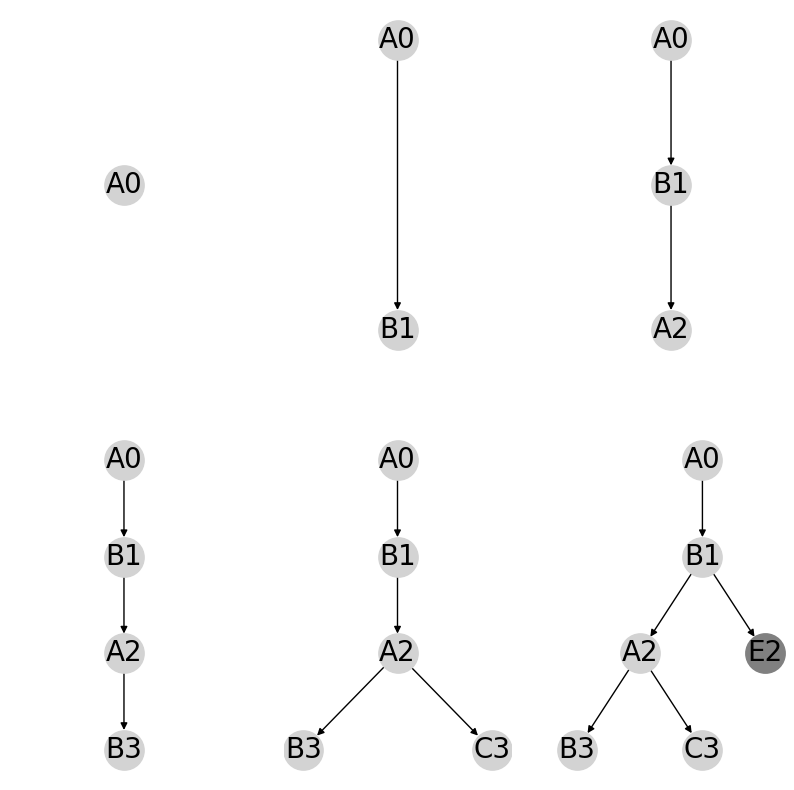

In [43]:
import matplotlib.pyplot as plt

nrows=2; ncols=3
fig, _ = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
axes = iter(fig.axes)
DG={}

def draw_graph(DG, source, target=[],):
  nxDG=nx.DiGraph(DG)
  ax = next(axes)
  pos_nodes = nx.nx_agraph.pygraphviz_layout(nxDG,prog='dot',root=source)
  nx.draw(nxDG,pos=pos_nodes, ax=ax, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
  nx.draw_networkx_nodes(DG,pos=pos_nodes, nodelist=target, node_color='gray', node_size=800)


def bt(G, s, maxd, Target):
  DG.update({s+str(M-maxd):[]})
  if s in Target:
    draw_graph(DG, source, [s+str(M-maxd)])
    return [s]
  draw_graph(DG, source)  
  if maxd == 0:
    return None
  for n in iter(G[s]):
    Adj = DG[s+str(M-maxd)]; Adj.append(n+str(M-(maxd-1))); DG[s+str(M-maxd)] = Adj;
    path = bt(G, n, maxd-1, Target)
    if path != None:
      return [s]+path
  return None

M = 3      
print(bt(G,source,M,Target))



BT is incomplete and suboptimal  
**Complexity**: G with branching factor $b$ and maximum depth $m$ 
  
  $O(b^m)$ temporal cost and $O(m)$ spatial cost